# Kruskal's algorithm

## Libraries import

In [1]:
import json                       # Read and write files in json
import numpy as np                # Matrix operations
import networkx as nx             # Graph operation and display
from pprint import pprint         # Pretty printing of matrices
import matplotlib.pyplot as plt   # Plot figures

## Settings

In [2]:
file_path = "test_graph.json"

In [3]:
# Display settings
figure_size = (5, 5)             # (x,y) expressed in inches
# Color of the nodes of the graph in the #RRBBGG format
node_color = "#89b2f4"
mst_edges_color = "#FF0000"      # Color of the edges that form the MST
default_edge_colour = "#000000"  # Clour of the edges that don't belong to the MST

## Load the graph

In [4]:
with open(file_path, "r") as f:
    graph = json.load(f)
pprint(graph)

[[[1, 6], [2, 3], [3, 1]],
 [[0, 6], [2, 2], [4, 6], [5, 4]],
 [[0, 3], [1, 2], [6, 1]],
 [[0, 1], [4, 3]],
 [[1, 6], [3, 3], [5, 6], [6, 6]],
 [[1, 4], [4, 6]],
 [[2, 1], [4, 6]]]


In [5]:
n_of_vertices = len(graph)
print(n_of_vertices)

7


In [6]:
# Convert the graph in a list of triples in the form (start, end, weight)
graph = [(start, *v) for start, value in enumerate(graph) for v in value]
pprint(graph)

[(0, 1, 6),
 (0, 2, 3),
 (0, 3, 1),
 (1, 0, 6),
 (1, 2, 2),
 (1, 4, 6),
 (1, 5, 4),
 (2, 0, 3),
 (2, 1, 2),
 (2, 6, 1),
 (3, 0, 1),
 (3, 4, 3),
 (4, 1, 6),
 (4, 3, 3),
 (4, 5, 6),
 (4, 6, 6),
 (5, 1, 4),
 (5, 4, 6),
 (6, 2, 1),
 (6, 4, 6)]


# Kruskal without graph transformation

In [7]:
def find_minimum_outgoing_edge():
    """Function to be rewritten in quantum form for speed up"""
    outgoing_edges = [edge for edge in graph if edge[0]
                      not in Nodes_visited or edge[1] not in Nodes_visited]
    return min(outgoing_edges, key=lambda x: x[2])

In [8]:
# Set of nodes already inside the MST
Nodes_visited = set([])
# Set of edges of the MST
MST_edges = []

# For each edge in the graph
for i in range(n_of_vertices-2):
    edge = find_minimum_outgoing_edge()
    start, end, weight = edge
    MST_edges.append(edge)
    Nodes_visited.add(start)
    Nodes_visited.add(end)

# Print the results
pprint(MST_edges)

[(0, 3, 1), (2, 6, 1), (1, 2, 2), (3, 4, 3), (1, 5, 4)]


# Kruskal with graph transformation

### Transform the graph into a convininet rappresentation
Rappresent the graph as an list of triples sorted on the weight. This can be done more efficently with an heap but since sorting is a $O(n \log{(n)})$ and an heap has $O(\log{(n)})$ insertion the complexity of creating the heap is also $O(n \log{(n)})$ so this should be enough.

In [9]:
# Sort it ascending on the weight
graph.sort(key=lambda x: x[2])
pprint(graph)

[(0, 3, 1),
 (2, 6, 1),
 (3, 0, 1),
 (6, 2, 1),
 (1, 2, 2),
 (2, 1, 2),
 (0, 2, 3),
 (2, 0, 3),
 (3, 4, 3),
 (4, 3, 3),
 (1, 5, 4),
 (5, 1, 4),
 (0, 1, 6),
 (1, 0, 6),
 (1, 4, 6),
 (4, 1, 6),
 (4, 5, 6),
 (4, 6, 6),
 (5, 4, 6),
 (6, 4, 6)]


### the algorithm

In [10]:
def is_outgoing(edge):
    """Function to be rewritten in quantum form for speed up"""
    start, end, weight = edge
    return start not in Nodes_visited or end not in Nodes_visited

In [11]:
# Set of nodes already inside the MST
Nodes_visited = set([])
# Set of edges of the MST
MST_edges = []

# For each edge in the graph
for edge in graph:
    # If the algorithm visited all the nodes then it's done
    if len(Nodes_visited) == n_of_vertices:
        break
    start, end, weight = edge
    # if the edge will add at least one node add it
    if is_outgoing(edge):
        MST_edges.append(edge)
        Nodes_visited.add(start)
        Nodes_visited.add(end)

# Print the results
pprint(MST_edges)

[(0, 3, 1), (2, 6, 1), (1, 2, 2), (3, 4, 3), (1, 5, 4)]


# Display the result

/home/zommiommy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


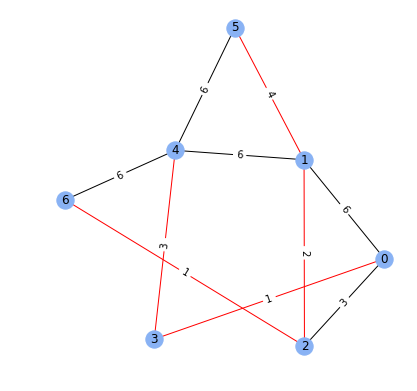

In [12]:
# Create an empty graph
g = nx.Graph()

# add all the vertecies to the graph
for i in range(n_of_vertices):
    g.add_node(i)

# Add all the edges to the graph
for start, end, weight in graph:
    g.add_edge(start, end, weight=weight)

for start, end, weight in MST_edges:
    g.add_edge(start, end, weight=weight, color=mst_edges_color)

# Display the Graph
# Create and set the dimension of the final image
plt.figure(figsize=figure_size)
# Calculate the spatial disposition of the nodes using the spring algorithm
pos = nx.spring_layout(g)
# Get the colours of the modified edges
colour_dict = nx.get_edge_attributes(g, "color")
# Calculate the colour of the edges
e_color = [colour_dict.get(edge, default_edge_colour) for edge in g.edges()]
# Draw the graph
nx.draw(g, pos, with_labels=True, node_color=node_color, edge_color=e_color)
# Draw the weight labels over the edges
nx.draw_networkx_edge_labels(
    g, pos, edge_labels=nx.get_edge_attributes(g, "weight"))
# Show the result
plt.show()